In [23]:
#1638
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
df_gender_submission = pd.read_csv('./input/gender_submission.csv')

In [25]:
print("df_train:{}".format(df_train.shape))
print(df_train.columns)
print()
print("df_test:{}".format(df_test.shape))
print(df_test.columns)
print()
print("df_gender_submission:{}".format(df_gender_submission.shape))

df_train:(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

df_test:(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

df_gender_submission:(418, 2)


In [26]:
df_train.info()
print()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null floa

In [27]:
df_train.head()
# Embarked は出港場所

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 欠損値の確認

In [28]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 要約統計量

In [29]:
# df_trainとdf_testを連結
df_full = pd.concat([df_train, df_test], axis=0, ignore_index=True) # index 0から振り直す
display(df_full.iloc[891:900])
# Nanの個数
df_full["Survived"].isnull().sum()

print(df_full.shape)
df_full.describe() # df_fullの要約統計量

/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
891,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
892,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
893,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
894,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
895,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298
896,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538
897,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972
898,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,NaN,248738
899,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,NaN,2657


(1309, 12)


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [30]:
df_full.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [31]:
df_train.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9]) # 数値型の情報

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [32]:
df_full.describe(include='O') # Object型の要素数、ユニーク数、最頻値、最頻値の出現回数

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343
freq,6,914,2,843,11


## 死亡者と生存者の可視化

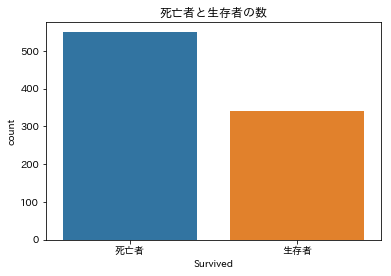

0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [33]:
sns.countplot(x='Survived', data=df_train)
plt.title('死亡者と生存者の数') 
plt.xticks([0,1], ['死亡者', '生存者'])
plt.show()
display(df_train['Survived'].value_counts())
display(df_train['Survived'].value_counts()/len(df_train['Survived']))

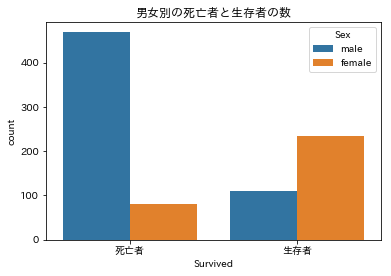

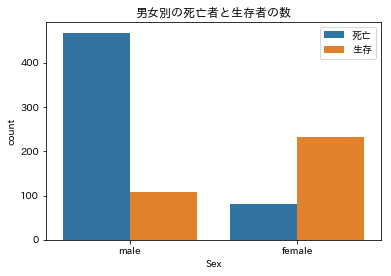

Survived,0,1
Sex,,
female,81,233
male,468,109


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [34]:
sns.countplot(x='Survived', hue='Sex', data=df_train) # hueは内側
plt.xticks([0,1], ['死亡者', '生存者'])
plt.title('男女別の死亡者と生存者の数')
plt.show()
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title('男女別の死亡者と生存者の数')
plt.legend(['死亡', '生存'])
plt.show()
#rename = lambda x: '生存' if x ==1 else '死亡'
#df_train['Survived']=[rename(i) for i in df_train['Survived'] ]
df_train['Survived']=[i for i in df_train['Survived'] ]
display(pd.crosstab(df_train['Sex'], df_train['Survived']))

display(pd.crosstab(df_train['Sex'], df_train['Survived'], normalize='index'))

## チケットクラス別

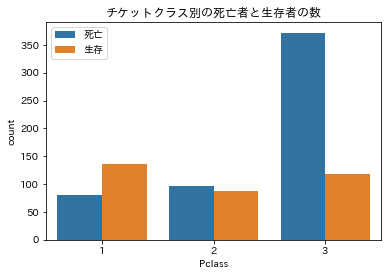

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [45]:
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title('チケットクラス別の死亡者と生存者の数')
plt.legend(['死亡','生存'])
plt.show()
display(pd.crosstab(df_train['Pclass'], df_train['Survived']))
display(pd.crosstab(df_train['Pclass'], df_train['Survived'], normalize='index'))

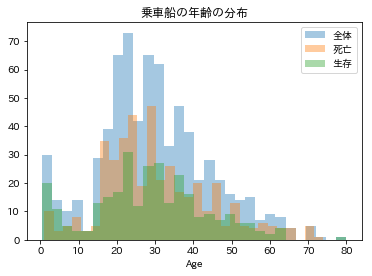

In [60]:
sns.distplot(df_train['Age'].dropna(),kde=False, bins=30) # kdeは近似関数を表示するか
sns.distplot(df_train[df_train['Survived']==0].Age.dropna(), kde=False,bins=30)
sns.distplot(df_train[df_train['Survived']==1].Age.dropna(), kde=False, bins=30)
plt.title("乗車船の年齢の分布")
plt.legend(["全体","死亡","生存"])

In [63]:
df_train['CategoricalAge']=pd.cut(df_train['Age'], 8)
display(pd.crosstab(df_train['CategoricalAge'], df_train['Survived']))
display(pd.crosstab(df_train['CategoricalAge'], df_train['Survived'], normalize=True))

Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",26,38
"(10.368, 20.315]",71,44
"(20.315, 30.263]",146,84
"(30.263, 40.21]",86,69
"(40.21, 50.158]",53,33
"(50.158, 60.105]",25,17
"(60.105, 70.052]",13,4
"(70.052, 80.0]",4,1


Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",0.036415,0.053221
"(10.368, 20.315]",0.099440,0.061625
"(20.315, 30.263]",0.204482,0.117647
"(30.263, 40.21]",0.120448,0.096639
"(40.21, 50.158]",0.074230,0.046218
"(50.158, 60.105]",0.035014,0.023810
"(60.105, 70.052]",0.018207,0.005602
"(70.052, 80.0]",0.005602,0.001401


## 兄弟・配偶者の数

Text(0.5, 1.0, '同乗している兄弟・配偶者の数')

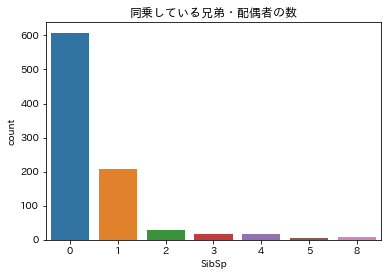

In [64]:
sns.countplot(x='SibSp', data=df_train)
plt.title('同乗している兄弟・配偶者の数')

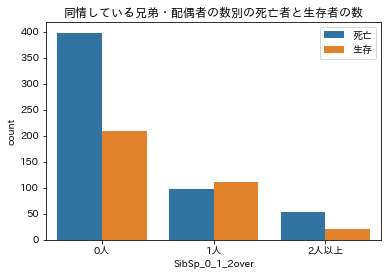

Survived,0,1
SibSp_0_1_2over,,
0,398,210
1,97,112
2,54,20


Survived,0,1
SibSp_0_1_2over,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.729730,0.270270


In [68]:
df_train['SibSp_0_1_2over']=[i  if i<=1 else 2 for i in df_train['SibSp']]
sns.countplot(x='SibSp_0_1_2over', hue='Survived', data=df_train)
plt.legend(['死亡', '生存'])
plt.xticks([0,1,2],['0人', '1人', '2人以上'])
plt.title('同情している兄弟・配偶者の数別の死亡者と生存者の数')
plt.show()

display(pd.crosstab(df_train['SibSp_0_1_2over'], df_train['Survived']))
display(pd.crosstab(df_train['SibSp_0_1_2over'], df_train['Survived'], normalize='index'))

In [69]:
## 両親・子供の数

Text(0.5, 1.0, '同情している両親・子供の数')

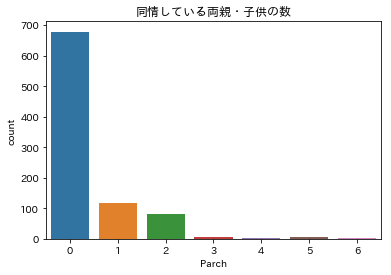

In [70]:
sns.countplot(x='Parch', data=df_train)
plt.title('同乗している両親・子供の数')

Survived,0,1
Parch_0_1_2over,,
0,445,233
1,53,65
2,40,40
3,11,4


Survived,0,1
Parch_0_1_2over,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.733333,0.266667


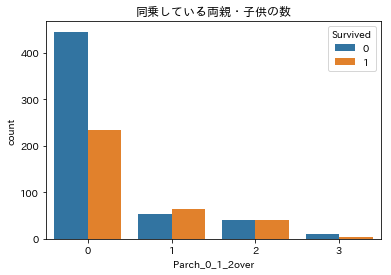

In [74]:
df_train['Parch_0_1_2over']=[i if i<=2 else 3 for i in df_train['Parch']]
sns.countplot(x='Parch_0_1_2over', hue='Survived', data=df_train)
plt.title('同乗している両親・子供の数')
display(pd.crosstab(df_train['Parch_0_1_2over'], df_train['Survived']))
display(pd.crosstab(df_train['Parch_0_1_2over'], df_train['Survived'], normalize='index'))

## 同乗している家族の数

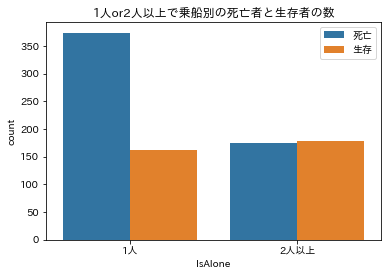

Survived,0,1
IsAlone,,
0,374,163
1,175,179


Survived,0,1
IsAlone,,
0,0.419753,0.182941
1,0.196409,0.200898


In [90]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['IsAlone'] = 0 # すべての値を0
df_train.loc[df_train['FamilySize'] >= 2, 'IsAlone'] = 1
sns.countplot(x='IsAlone', hue='Survived', data=df_train)
plt.xticks([0,1], ['1人', '2人以上'])
plt.legend(['死亡', '生存'])
plt.title('1人or2人以上で乗船別の死亡者と生存者の数')
plt.show()

display(pd.crosstab(df_train['IsAlone'], df_train['Survived']))
display(pd.crosstab(df_train['IsAlone'], df_train['Survived'], normalize=True))

## 運賃の分布

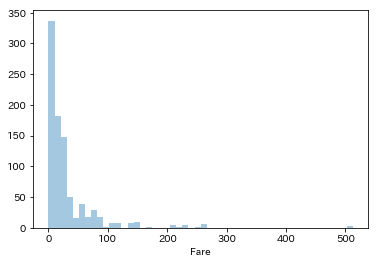

In [92]:
sns.distplot(df_train['Fare'].dropna(), kde=False)
plt.title('運賃の分布')

In [95]:
df_train['CategoricalFare'] = pd.qcut(df_train['Fare'], 4) # 
#df_train[['CategoricalFare'],['Survived']].groupby(['CategoricalFare'], as_index=False).mean()
display(pd.crosstab(df_train['CategoricalFare'], df_train['Survived']))
display(pd.crosstab(df_train['CategoricalFare'], df_train['Survived'], normalize=True))

Survived,0,1
CategoricalFare,,
"(-0.001, 7.91]",179,44
"(7.91, 14.454]",156,68
"(14.454, 31.0]",121,101
"(31.0, 512.329]",93,129


Survived,0,1
CategoricalFare,,
"(-0.001, 7.91]",0.200898,0.049383
"(7.91, 14.454]",0.175084,0.076319
"(14.454, 31.0]",0.135802,0.113356
"(31.0, 512.329]",0.104377,0.144781


## 名前

In [98]:
df_test['Name'][:5]

pandas.core.series.Series

In [103]:
set(df_train['Name'].str.extract('([A-Za-z]+)\.', expand=False)) # strは各要素に対して文字列メソッドを適用, expandはTrueなら絶対DF

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [104]:
import collections
collections.Counter(df_train['Name'].str.extract('([A-Za-z]+)\.', expand=False))

Counter({'Mr': 517,
         'Mrs': 125,
         'Miss': 182,
         'Master': 40,
         'Don': 1,
         'Rev': 6,
         'Dr': 7,
         'Mme': 1,
         'Ms': 1,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'Countess': 1,
         'Jonkheer': 1})

In [107]:
df_train['Title']=df_train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df_test['Title']=df_test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df_train.groupby('Title').mean()['Age']

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [108]:
def title_to_num(title):
    if title == 'Master':
        return 1
    elif title == 'Miss':
        return 2
    elif title == 'Mr':
        return 3
    elif title == 'Mrs':
        return 4
    else:
        return 5
    
df_train['Title_num']=[title_to_num(i) for i in df_train['Name']]
df_test['Title_num']=[title_to_num(i) for i in df_test['Name']]